In [4]:
!pip install catboost
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


#machine learning Algorithms For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [5]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets


In [6]:

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [8]:
X.info();   print("----------------"*3)   ; y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dt

In [9]:
X.describe(),   print("----------------"*3)   , y.describe()

------------------------------------------------


(       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
 count    6497.000000       6497.000000  6497.000000     6497.000000   
 mean        7.215307          0.339666     0.318633        5.443235   
 std         1.296434          0.164636     0.145318        4.757804   
 min         3.800000          0.080000     0.000000        0.600000   
 25%         6.400000          0.230000     0.250000        1.800000   
 50%         7.000000          0.290000     0.310000        3.000000   
 75%         7.700000          0.400000     0.390000        8.100000   
 max        15.900000          1.580000     1.660000       65.800000   
 
          chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
 count  6497.000000          6497.000000           6497.000000  6497.000000   
 mean      0.056034            30.525319            115.744574     0.994697   
 std       0.035034            17.749400             56.521855     0.002999   
 min       0.009000             1.

In [10]:

# Visualize data distribution for each feature
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Pairplot to visualize relationships between features
sns.pairplot(X)
plt.show()

# Boxplots to identify outliers
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y['quality'])
plt.title('Distribution of Wine Quality')
plt.show()


# Relationship between features and target variable
for col in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=col, data=pd.concat([X, y], axis=1))
    plt.title(f'Relationship between {col} and Wine Quality')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

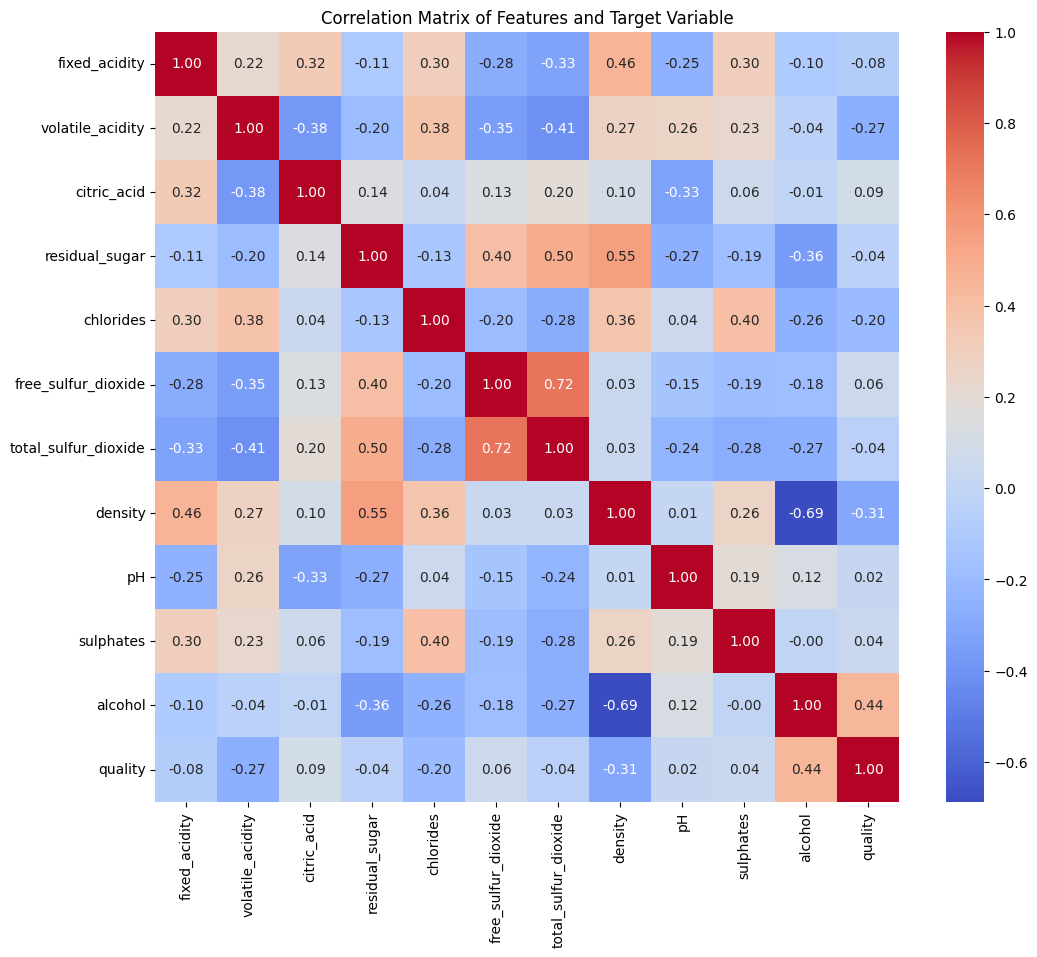

In [11]:

# Calculate the correlation matrix
correlation_matrix = pd.concat([X, y], axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

In [12]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=X.columns)

joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [13]:

from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)  # Set a random state for reproducibility

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y['quality'])

# Example of converting back to a DataFrame (optional):
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.DataFrame(y_resampled, columns=['quality'])

# Print the class distribution after oversampling
print(y_resampled['quality'].value_counts())

quality
5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable (y_train) and transform it
y_train = label_encoder.fit_transform(y_train['quality'])
y_test = label_encoder.transform(y_test['quality'])  # Transform y_test using the same encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [18]:
# Dictionary of classification algorithms
algorithms = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1),  # Suppress LightGBM logs
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000)
}


Training Logistic Regression...
Saved Logistic Regression model to saved_models/Logistic Regression.joblib
Logistic Regression Metrics:
Accuracy: 0.4845
Precision: 0.4707
Recall: 0.4845
F1 Score: 0.4749
----------------------------------------
Training Decision Tree...
Saved Decision Tree model to saved_models/Decision Tree.joblib
Decision Tree Metrics:
Accuracy: 0.8278
Precision: 0.8242
Recall: 0.8278
F1 Score: 0.8257
----------------------------------------
Training Random Forest...
Saved Random Forest model to saved_models/Random Forest.joblib
Random Forest Metrics:
Accuracy: 0.9036
Precision: 0.9002
Recall: 0.9036
F1 Score: 0.9011
----------------------------------------
Training SVC...
Saved SVC model to saved_models/SVC.joblib
SVC Metrics:
Accuracy: 0.7225
Precision: 0.7069
Recall: 0.7225
F1 Score: 0.7093
----------------------------------------
Training KNN...
Saved KNN model to saved_models/KNN.joblib
KNN Metrics:
Accuracy: 0.8436
Precision: 0.8329
Recall: 0.8436
F1 Score: 0.83

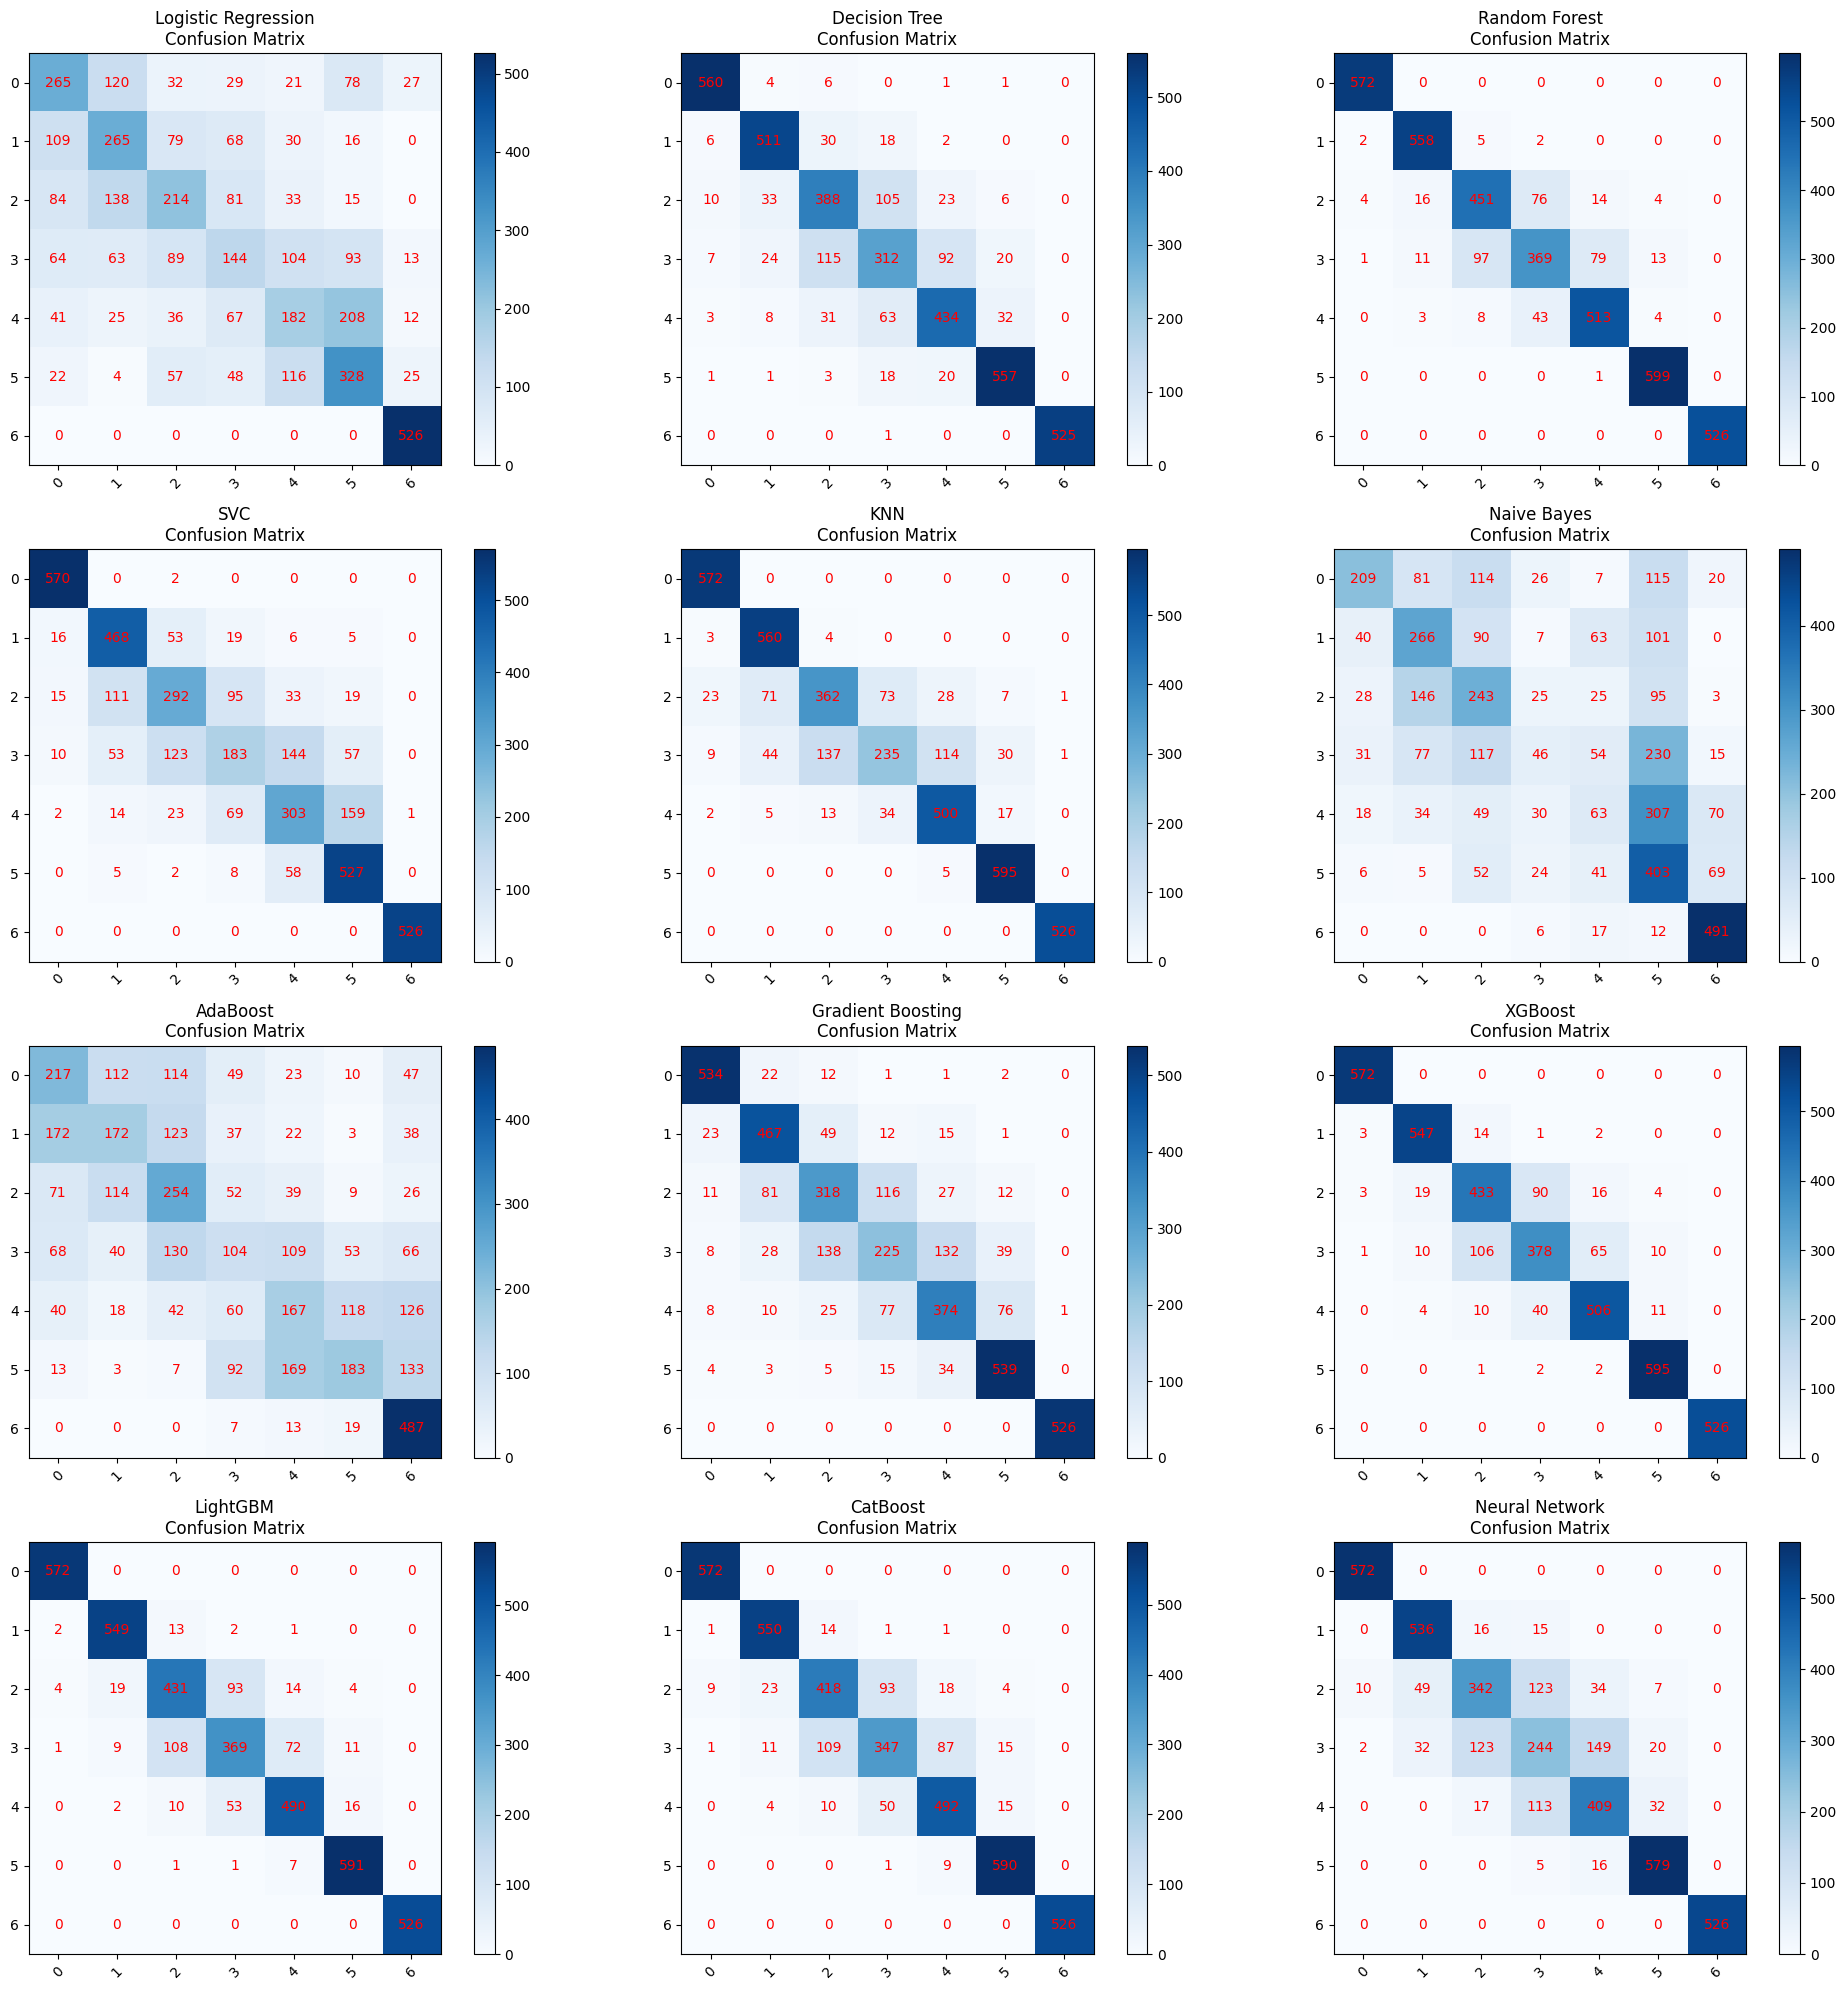

In [19]:
# Initialize a figure for confusion matrices
plt.figure(figsize=(20, 20))
models_dir = "saved_models"
os.makedirs(models_dir, exist_ok=True)

# Train and evaluate each algorithm
for i, (name, model) in enumerate(algorithms.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)
    print(f"Saved {name} model to {model_filename}")

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

    # Plot confusion matrix in a subplot
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(4, 3, i+1)  # 4 rows, 3 columns for 12 algorithms
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"{name}\nConfusion Matrix")
    plt.colorbar()

    # Get the number of unique classes in the target variable
    num_classes = len(np.unique(y_test))

    tick_marks = np.arange(num_classes)  # Use num_classes instead of hardcoding 7
    plt.xticks(tick_marks, np.unique(y_test), rotation=45) # Use unique class labels
    plt.yticks(tick_marks, np.unique(y_test))  # Use unique class labels

    # Labeling the matrix - adjust loop ranges
    for j in range(cm.shape[0]): # Iterate over actual classes (rows)
        for k in range(cm.shape[1]): # Iterate over predicted classes (columns)
            plt.text(k, j, format(cm[j, k], 'd'), ha="center", va="center", color="red")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [25]:


# Load the scaler
scaler = joblib.load('scaler.pkl')

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')

# Load all saved models
models_dir = "saved_models"
loaded_models = {}
for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove ".joblib" extension
        model_path = os.path.join(models_dir, filename)
        loaded_models[model_name] = joblib.load(model_path)

# Example new record data (replace with your actual data)
new_record = pd.DataFrame({
    'fixed_acidity': [7.4],
    'volatile_acidity': [0.70],
    'citric_acid': [0.00],
    'residual_sugar': [1.9],
    'chlorides': [0.076],
    'free_sulfur_dioxide': [11.0],
    'total_sulfur_dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})


# Preprocess the new record
new_record_scaled = scaler.transform(new_record)

# Make predictions using each loaded model
for model_name, model in loaded_models.items():
    prediction = model.predict(new_record_scaled)
    predicted_class = label_encoder.inverse_transform(prediction)[0]  # Inverse transform to get the original label
    print(f"Prediction from {model_name}: {predicted_class}")

Prediction from Decision Tree: 5
Prediction from SVC: 4
Prediction from CatBoost: 5
Prediction from Gradient Boosting: 5
Prediction from Random Forest: 5
Prediction from AdaBoost: 4
Prediction from Logistic Regression: 4
Prediction from LightGBM: 5
Prediction from KNN: 5
Prediction from Neural Network: 5
Prediction from XGBoost: 5
Prediction from Naive Bayes: 4
